In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship')


x_train = x_train / 255.0
x_test = x_test / 255.0

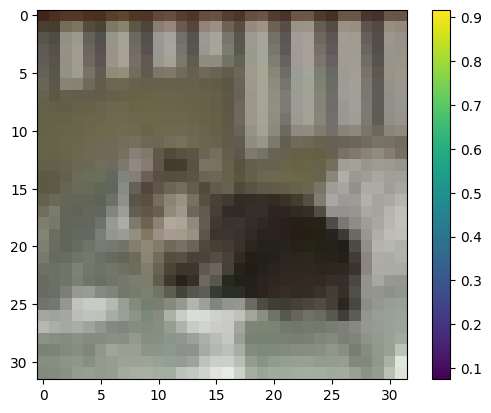

In [ ]:
plt.figure()
plt.imshow(x_train[150])
plt.colorbar()
plt.grid(False)

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
    
])

In [ ]:
model.summary()

In [ ]:

model.compile(
              optimizer='Nadam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
625/625 [==============================] - 11s 12ms/step - loss: 0.0650 - accuracy: 0.4699 - val_loss: 0.0505 - val_accuracy: 0.6169
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.0441 - accuracy: 0.6737 - val_loss: 0.0401 - val_accuracy: 0.7080
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0361 - accuracy: 0.7382 - val_loss: 0.0354 - val_accuracy: 0.7445
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0305 - accuracy: 0.7829 - val_loss: 0.0338 - val_accuracy: 0.7541
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0258 - accuracy: 0.8206 - val_loss: 0.0319 - val_accuracy: 0.7704
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0222 - accuracy: 0.8468 - val_loss: 0.0342 - val_accuracy: 0.7607
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0195 - accuracy: 0.8669 - val_loss: 0.0310 - val_accuracy: 0.786

In [ ]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 3s 2ms/step


Text(0.5, 0, '[0]')

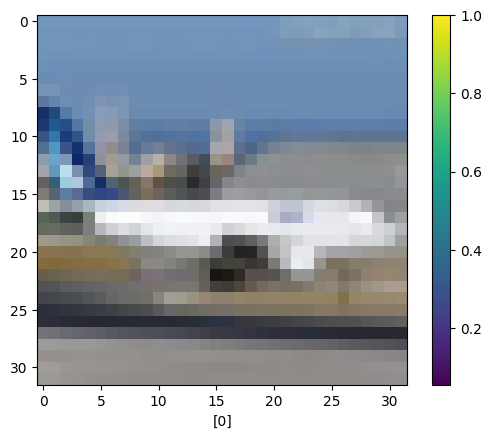

In [ ]:
predictions[90]

np.argmax(predictions[90])
y_test[90]

plt.figure()
plt.imshow(x_test[90])
plt.colorbar()
plt.grid(False)

plt.xlabel(y_test[90])